In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import r2_score, mean_absolute_error, \
mean_squared_error, confusion_matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
import copy

## Описание проекта

Вы работаете в IT-компании, которая выполняет на заказ проекты по машинному обучению. К вам обратился фермер, владелец молочного хозяйства «Вольный луг». Он хочет купить бурёнок, чтобы расширить поголовье стада коров. Для этого он заключил выгодный контракт с ассоциацией пастбищ «ЭкоФерма».

Условия позволяют фермеру очень тщательно отобрать коров. Он определяет качество молока по строгой методике, и при этом ему нужно выполнять свой план развития молочного хозяйства. Фермер хочет, чтобы каждая бурёнка давала не менее 6000 килограммов молока в год, а её надой был вкусным — строго по его критериям, ничуть не хуже. А продавцы и технологи так и норовят приукрасить своих коровок!

Поэтому он просит вас разработать модель машинного обучения, которая поможет ему управлять рисками и принимать объективное решение о покупке. «ЭкоФерма» готова предоставить подробные данные о своих коровах. Вам нужно создать две прогнозные модели для отбора бурёнок в поголовье:

   1. Первая будет прогнозировать возможный удой коровы (целевой признак `Удой`);
   2. Вторая — рассчитывать вероятность получить вкусное молоко от коровы (целевой признак `Вкус молока`).

С помощью модели нужно отобрать коров по двум критериям:

   * средний удой за год — не менее 6000 килограммов;
   * молоко должно быть вкусным.

## Описание данных

Вы будете работать с тремя датасетами:

`ferma_main.csv`

`ferma_dad.csv`

`cow_buy.csv`

1. Файл `ferma_main.csv` содержит данные о стаде фермера на текущий момент. Описание данных:
    * `id` — уникальный идентификатор коровы.
    * `Удой, кг` — масса молока, которую корова даёт в год (в килограммах).
    *`ЭКЕ (Энергетическая кормовая единица)` — показатель питательности корма коровы.
    * `Сырой протеин, г` — содержание сырого протеина в корме (в граммах).
    * `СПО (Сахаро-протеиновое соотношение)` — отношение сахара к протеину в корме коровы.
    * `Порода` — порода коровы.
    * `Тип пастбища` — ландшафт лугов, на которых паслась корова.
    порода папы_быка — порода папы коровы.
    * `Жирность,%` — содержание жиров в молоке (в процентах).
    * `Белок,%` — содержание белков в молоке (в процентах).
    * `Вкус молока` — оценка вкуса по личным критериям фермера, бинарный признак (вкусно, не вкусно).
    * `Возраст` — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).
    
    Признаки в датасете ferma_main.csv можно разделить на группы.

    * Характеристики коровы: `id`, `Порода`, `порода папы_быка`, `Возраст`.
    * Характеристики корма: `ЭКЕ (Энергетическая кормовая единица)`, `Сырой протеин, г`, `СПО (Сахаро-протеиновое соотношение)`.
    * Характеристика пастбища: `Тип пастбища`.
    * Характеристики молока: `Удой, кг`, `Жирность,%`, `Белок,%`, `Вкус молока`.
        
    Такое разделение поможет вам понять, как взаимосвязаны признаки в датасете.
    
2. Файл `ferma_dad.csv` хранит имя папы каждой коровы в стаде фермера. Описание данных:
    * `id` — уникальный идентификатор коровы.
    * `Имя Папы` — имя папы коровы.
    
3. Файл `cow_buy.csv` — это данные о коровах «ЭкоФермы», которых фермер хочет изучить перед покупкой. Описание данных:
    * `Порода` — порода коровы.
    * `Тип пастбища` — ландшафт лугов, на которых паслась корова.
    * `порода папы_быка` — порода папы коровы.
    * `Имя_папы` — имя папы коровы.
    * `Текущая_жирность,%` — содержание жиров в молоке (в процентах).
    * `Текущий_уровень_белок,%` — содержание белков в молоке (в процентах).
    * `Возраст` — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).
    
    Данные в файлах `ferma_main.csv` и `cow_buy.csv` похожи, но у датасета `cow_buy.csv` несколько особенностей.
    * Содержание белков и жиров в молоке указано на момент продажи — когда «ЭкоФерма» давала коровам свой корм.
    * Параметры корма `ЭКЕ (Энергетическая кормовая единица)`, `Сырой протеин, г` и `СПО (Сахаро-протеиновое соотношение)` отсутствуют. Технологи заказчика пересмотрели подход к кормлению: для новых коров планируется увеличить значения каждого из этих параметров на 5%.
    * Кроме того, отсутствуют признаки `Удой, кг` и `Вкус молока`. Это целевые признаки, именно их предстоит предсказать!

## Загрузка данных

In [ ]:
ferma_df = pd.read_csv('./ferma_main.csv', sep=';')
ferma_dad_df = pd.read_csv('./ferma_dad.csv', sep=';')
cow_buy_df = pd.read_csv('./cow_buy.csv', sep=';')
print('Размеры таблиц:')
print('ferma_main.csv:', ferma_df.shape)
print('ferma_dad.csv:', ferma_dad_df.shape)
print('cow_buy.csv:', cow_buy_df.shape)

Размеры таблиц:
ferma_main.csv: (634, 12)
ferma_dad.csv: (629, 2)
cow_buy.csv: (20, 7)


Первые 5 строк каждой из таблиц

In [137]:
display(ferma_df.head(5))

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,"14,2",1743,"0,89",Вис Бик Айдиал,Равнинное,Айдиал,"3,58","3,076",вкусно,более_2_лет
1,2,5529,"12,8",2138,"0,89",Вис Бик Айдиал,Равнинные,Соверин,"3,54","3,079",вкусно,менее_2_лет
2,3,5810,14,1854,"0,885",РефлешнСоверинг,Холмистое,Соверин,"3,59","3,074",не вкусно,более_2_лет
3,4,5895,"12,4",2012,"0,885",РефлешнСоверинг,Холмистое,Айдиал,"3,4","3,075",не вкусно,более_2_лет
4,5,5302,"12,8",1675,"0,885",Вис Бик Айдиал,Равнинные,Соверин,"3,73","3,073",вкусно,менее_2_лет


In [138]:
display(ferma_dad_df.head(5))

,id,Имя Папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


In [139]:
display(cow_buy_df.head(5))

,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,"3,54","3,081",менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,"3,4","3,061",более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,"3,64","3,074",более_2_лет


Изменяем названия столбцов и данные:
* Убираем пояснения к названию (в скобках)
* Заменяем подчеркивание на пробел

In [140]:
ferma_df = ferma_df.rename(columns=\
            {'ЭКЕ (Энергетическая кормовая единица)' : 'ЭКЕ', \
            'СПО (Сахаро-протеиновое соотношение)' : 'СПО', \
            'порода папы_быка' : 'порода папы быка'})
cow_buy_df = cow_buy_df.rename(columns=\
            {'порода папы_быка' : 'порода папы быка', \
            'Имя_папы' : 'Имя Папы', \
            'Текущая_жирность,%' : 'Текущая жирность,%', \
            'Текущий_уровень_белок,%' : 'Текущий уровень белка,%'})

Проверка названий столбцов

In [141]:
print(ferma_df.columns)
print(ferma_dad_df.columns)
print(cow_buy_df.columns)

Index(['id', 'Удой, кг', 'ЭКЕ', 'Сырой протеин, г', 'СПО', 'Порода',
       'Тип пастбища', 'порода папы быка', 'Жирность,%', 'Белок,%',
       'Вкус молока', 'Возраст'],
      dtype='object')
Index(['id', 'Имя Папы'], dtype='object')
Index(['Порода', 'Тип пастбища', 'порода папы быка', 'Имя Папы',
       'Текущая жирность,%', 'Текущий уровень белка,%', 'Возраст'],
      dtype='object')


Заменяем подчеркивания в столбце возраст на пробелы:

In [142]:
ferma_df['Возраст'] = ferma_df['Возраст']\
    .apply(lambda x: x.replace('_', ' '))
cow_buy_df['Возраст'] = cow_buy_df['Возраст']\
    .apply(lambda x: x.replace('_', ' '))

Изменяем названия столбцов в датафрейме `cow_buy.csv`:
* Текущая жирность,% -> Жирность,%
* Текущий уровень белка,% -> Белок,%

In [143]:
cow_buy_df = cow_buy_df.rename(columns={'Текущая жирность,%':'Жирность,%', 'Текущий уровень белка,%':'Белок,%'})

Проверка

In [144]:
display(ferma_df.head(3))
display(cow_buy_df.head(3))

,id,"Удой, кг",ЭКЕ,"Сырой протеин, г",СПО,Порода,Тип пастбища,порода папы быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,"14,2",1743,"0,89",Вис Бик Айдиал,Равнинное,Айдиал,"3,58","3,076",вкусно,более 2 лет
1,2,5529,"12,8",2138,"0,89",Вис Бик Айдиал,Равнинные,Соверин,"3,54","3,079",вкусно,менее 2 лет
2,3,5810,14,1854,"0,885",РефлешнСоверинг,Холмистое,Соверин,"3,59","3,074",не вкусно,более 2 лет


,Порода,Тип пастбища,порода папы быка,Имя Папы,"Жирность,%","Белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более 2 лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,"3,54","3,081",менее 2 лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более 2 лет


Вывод:

Проведена загрузка данных, приведены к единообразному вида названия столбцов и категориальные значения.

##  Предобработка данных

Проверка на наличие пропусков

In [145]:
ferma_df.isna().sum()

id                  0
Удой, кг            0
ЭКЕ                 0
Сырой протеин, г    0
СПО                 0
Порода              0
Тип пастбища        0
порода папы быка    0
Жирность,%          0
Белок,%             0
Вкус молока         0
Возраст             0
dtype: int64

Пропуски в первой таблице отсутствуют

In [146]:
ferma_dad_df.isna().sum()

id          0
Имя Папы    0
dtype: int64

Во второй таблице также нет пропусков

In [147]:
cow_buy_df.isna().sum()

Порода              0
Тип пастбища        0
порода папы быка    0
Имя Папы            0
Жирность,%          0
Белок,%             0
Возраст             0
dtype: int64

В третьей тоже не оказалось пропусков в данных

Проверка наличия явных дупликатов

In [148]:
ferma_df.duplicated().sum()

5

In [149]:
ferma_df = ferma_df.drop_duplicates()
ferma_df.duplicated().sum()

0

Удалили явные дупликаты в таблице ferma_df

In [150]:
ferma_dad_df.duplicated().sum()

0

В таблице ferma_dad_df нет явных дупликатов

In [151]:
cow_buy_df.duplicated().sum()

4

In [152]:
ferma_df.reset_index(inplace=True, drop=True)
display(ferma_df)

,id,"Удой, кг",ЭКЕ,"Сырой протеин, г",СПО,Порода,Тип пастбища,порода папы быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,"14,2",1743,"0,89",Вис Бик Айдиал,Равнинное,Айдиал,"3,58","3,076",вкусно,более 2 лет
1,2,5529,"12,8",2138,"0,89",Вис Бик Айдиал,Равнинные,Соверин,"3,54","3,079",вкусно,менее 2 лет
2,3,5810,14,1854,"0,885",РефлешнСоверинг,Холмистое,Соверин,"3,59","3,074",не вкусно,более 2 лет
3,4,5895,"12,4",2012,"0,885",РефлешнСоверинг,Холмистое,Айдиал,"3,4","3,075",не вкусно,более 2 лет
4,5,5302,"12,8",1675,"0,885",Вис Бик Айдиал,Равнинные,Соверин,"3,73","3,073",вкусно,менее 2 лет
...,...,...,...,...,...,...,...,...,...,...,...,...
624,625,6812,"15,4",1964,"0,94",РефлешнСоверинг,Равнинное,Айдиал,"3,74","3,075",не вкусно,более 2 лет
625,626,5513,"12,9",1700,"0,88",РефлешнСоверинг,Равнинное,Соверин,"3,64","3,073",вкусно,менее 2 лет
626,627,5970,"14,4",1837,"0,88",РефлешнСоверинг,Холмистое,Соверин,"3,64","3,075",не вкусно,более 2 лет
627,628,5746,"13,8",1994,"0,89",РефлешнСоверинг,Равнинное,Соверин,"3,64","3,077",вкусно,более 2 лет


In [153]:
cow_buy_df.reset_index(inplace=True, drop=True)
display(cow_buy_df)

,Порода,Тип пастбища,порода папы быка,Имя Папы,"Жирность,%","Белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более 2 лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,"3,54","3,081",менее 2 лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более 2 лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,"3,4","3,061",более 2 лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,"3,64","3,074",более 2 лет
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,"3,63","3,053",менее 2 лет
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более 2 лет
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,"3,57","3,079",более 2 лет
8,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более 2 лет
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,"3,4","3,079",менее 2 лет


Удалили явные дупликаты в таблице cow_buy_df

Проверка типов данных

In [154]:
ferma_df.head(5)

,id,"Удой, кг",ЭКЕ,"Сырой протеин, г",СПО,Порода,Тип пастбища,порода папы быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,"14,2",1743,"0,89",Вис Бик Айдиал,Равнинное,Айдиал,"3,58","3,076",вкусно,более 2 лет
1,2,5529,"12,8",2138,"0,89",Вис Бик Айдиал,Равнинные,Соверин,"3,54","3,079",вкусно,менее 2 лет
2,3,5810,14,1854,"0,885",РефлешнСоверинг,Холмистое,Соверин,"3,59","3,074",не вкусно,более 2 лет
3,4,5895,"12,4",2012,"0,885",РефлешнСоверинг,Холмистое,Айдиал,"3,4","3,075",не вкусно,более 2 лет
4,5,5302,"12,8",1675,"0,885",Вис Бик Айдиал,Равнинные,Соверин,"3,73","3,073",вкусно,менее 2 лет


In [155]:
ferma_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                629 non-null    int64 
 1   Удой, кг          629 non-null    int64 
 2   ЭКЕ               629 non-null    object
 3   Сырой протеин, г  629 non-null    int64 
 4   СПО               629 non-null    object
 5   Порода            629 non-null    object
 6   Тип пастбища      629 non-null    object
 7   порода папы быка  629 non-null    object
 8   Жирность,%        629 non-null    object
 9   Белок,%           629 non-null    object
 10  Вкус молока       629 non-null    object
 11  Возраст           629 non-null    object
dtypes: int64(3), object(9)
memory usage: 59.1+ KB


* Тип столбца `ЭКЕ (Энергетическая кормовая единица)` необходимо изменить на `float64`
* Тип столбца `СПО (Сахаро-протеиновое соотношение)` необходимо изменить на `float64`
* Тип столбца `Жирность,%` необходимо изменить на `float64`
* Тип столбца `Белок,%` необходимо изменить на `float64`

In [156]:
ferma_df['ЭКЕ'] = \
ferma_df['ЭКЕ']\
.apply(lambda x: x.replace(',', '.'))

ferma_df['ЭКЕ'] = \
ferma_df['ЭКЕ'].astype('float')

In [157]:
ferma_df['СПО'] = \
ferma_df['СПО']\
.apply(lambda x: x.replace(',', '.'))

ferma_df['СПО'] = \
ferma_df['СПО'].astype('float')

In [158]:
ferma_df['Жирность,%'] = \
ferma_df['Жирность,%']\
.apply(lambda x: x.replace(',', '.'))

ferma_df['Жирность,%'] = \
ferma_df['Жирность,%'].astype('float')

In [159]:
ferma_df['Белок,%'] = \
ferma_df['Белок,%']\
.apply(lambda x: x.replace(',', '.'))

ferma_df['Белок,%'] = \
ferma_df['Белок,%'].astype('float')

Проверям, что типы изменились

In [160]:
ferma_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                629 non-null    int64  
 1   Удой, кг          629 non-null    int64  
 2   ЭКЕ               629 non-null    float64
 3   Сырой протеин, г  629 non-null    int64  
 4   СПО               629 non-null    float64
 5   Порода            629 non-null    object 
 6   Тип пастбища      629 non-null    object 
 7   порода папы быка  629 non-null    object 
 8   Жирность,%        629 non-null    float64
 9   Белок,%           629 non-null    float64
 10  Вкус молока       629 non-null    object 
 11  Возраст           629 non-null    object 
dtypes: float64(4), int64(3), object(5)
memory usage: 59.1+ KB


Вторая таблица

In [161]:
ferma_dad_df.head(5)

,id,Имя Папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


In [162]:
ferma_dad_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   Имя Папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


Все типы правильные

Третья таблица

In [163]:
cow_buy_df.head(5)

,Порода,Тип пастбища,порода папы быка,Имя Папы,"Жирность,%","Белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более 2 лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,"3,54","3,081",менее 2 лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более 2 лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,"3,4","3,061",более 2 лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,"3,64","3,074",более 2 лет


In [164]:
cow_buy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Порода            20 non-null     object
 1   Тип пастбища      20 non-null     object
 2   порода папы быка  20 non-null     object
 3   Имя Папы          20 non-null     object
 4   Жирность,%        20 non-null     object
 5   Белок,%           20 non-null     object
 6   Возраст           20 non-null     object
dtypes: object(7)
memory usage: 1.2+ KB


* Тип столбца `Текущая_жирность,%` необходимо изменить на `float64`
* Тип столбца `Текущий_уровень_белок,%` необходимо изменить на `float64`

In [165]:
cow_buy_df['Жирность,%'] = \
cow_buy_df['Жирность,%']\
.apply(lambda x: x.replace(',', '.'))

cow_buy_df['Жирность,%'] = \
cow_buy_df['Жирность,%'].astype('float')

In [166]:
cow_buy_df['Белок,%'] = \
cow_buy_df['Белок,%']\
.apply(lambda x: x.replace(',', '.'))

cow_buy_df['Белок,%'] = \
cow_buy_df['Белок,%'].astype('float')

Проверка изменения типов

In [167]:
cow_buy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Порода            20 non-null     object 
 1   Тип пастбища      20 non-null     object 
 2   порода папы быка  20 non-null     object 
 3   Имя Папы          20 non-null     object 
 4   Жирность,%        20 non-null     float64
 5   Белок,%           20 non-null     float64
 6   Возраст           20 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.2+ KB


Вывод:

Проведена предобработка данных, удалены явные дупликаты и пропуски в данных. Числовые данные приведены к числовому типу.

## Исследовательский анализ данных

In [168]:
print(ferma_df.shape)
print(ferma_dad_df.shape)
print(cow_buy_df.shape)

(629, 12)
(629, 2)
(20, 7)


Таблица ferma_df

In [169]:
ferma_df.describe()

,id,"Удой, кг",ЭКЕ,"Сырой протеин, г",СПО,"Жирность,%","Белок,%"
count,629.00000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000
mean,315.00000,6188.750397,14.543879,1923.364070,0.913116,3.603657,3.075671
std,181.72094,1644.795489,1.306408,182.956251,0.032203,0.168656,0.002549
min,1.00000,5204.000000,10.900000,1660.000000,0.840000,2.990000,3.069000
25%,158.00000,5751.000000,13.500000,1771.000000,0.890000,3.590000,3.074000
50%,315.00000,6133.000000,14.700000,1888.000000,0.930000,3.650000,3.076000
75%,472.00000,6501.000000,15.600000,2062.000000,0.940000,3.720000,3.077000
max,629.00000,45616.000000,16.800000,2349.000000,0.960000,3.750000,3.085000


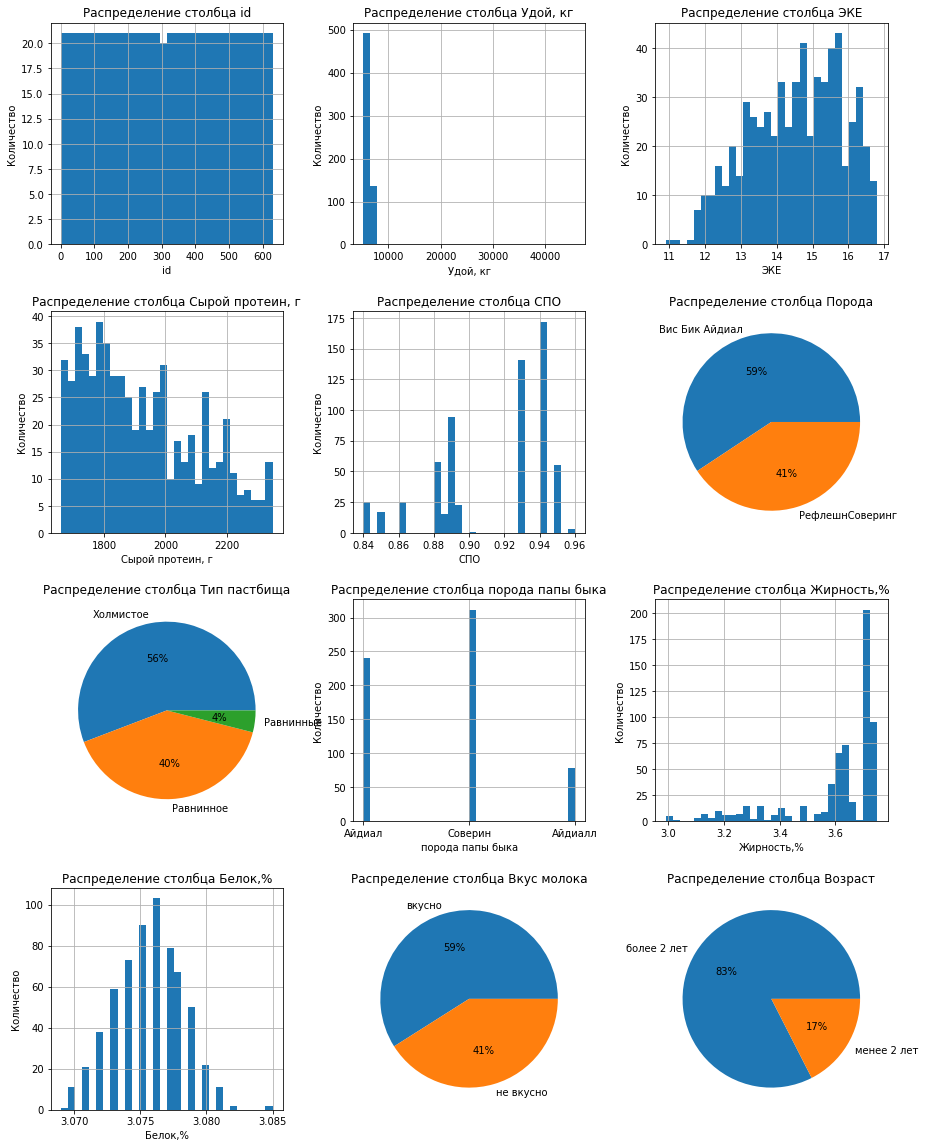

In [170]:
df_columns = ferma_df.columns
df_columns_short = [column[:(column.find('(')-1)] \
                           if column.find('(') != -1 else column \
                    for column in df_columns]
categorial_columns = ['Порода',
       'Тип пастбища', 'порода папы_быка',
       'Вкус молока', 'Возраст']
numerical_columns = ['id', 'Удой, кг', 'ЭКЕ',
       'Сырой протеин, г', 'СПО', 'Жирность,%', 'Белок,%']
fig = plt.figure(figsize=(15, 20));
for i, column in enumerate(df_columns):
    plt.subplot(4, 3, i+1)
    if column in categorial_columns:
        ferma_df[column].value_counts().plot(
    kind= 'pie',
    title= 'Распределение столбца ' + df_columns_short[i],
    autopct = "%.0f%%",
    ylabel= ""
)
    else:
        plt.hist(ferma_df[column], bins=30)
        plt.title('Распределение столбца ' + df_columns_short[i])
        plt.xlabel(column)
        plt.ylabel('Количество')
        plt.grid()
plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show();

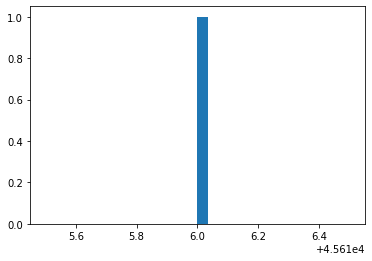

In [171]:
plt.hist(ferma_df[ferma_df['Удой, кг'] > 8000]['Удой, кг'], bins=30);

In [172]:
display(ferma_df[ferma_df['Удой, кг'] > 8000])

,id,"Удой, кг",ЭКЕ,"Сырой протеин, г",СПО,Порода,Тип пастбища,порода папы быка,"Жирность,%","Белок,%",Вкус молока,Возраст
16,17,45616,11.5,1675,0.93,Вис Бик Айдиал,Холмистое,Айдиалл,3.22,3.076,вкусно,более 2 лет


Имеем только 1 выброс, удаляем его

In [173]:
ferma_df = ferma_df[ferma_df['Удой, кг'] <= 8000]

Проверка

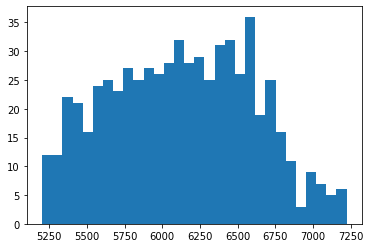

In [174]:
plt.hist(ferma_df['Удой, кг'], bins=30);

* `id` - нет выбивающихся идентификаторов
* `Удой, кг` - большинство значений около 5000 кг, есть выбросы около 40000 кг
* `ЭКЕ (Энергетическая кормовая единица)` - от 11 до 17, нет выбросов
* `Сырой протеин, г` - нет выбросов или редких значений
* `СПО (Сахаро-протеиновое соотношение)` - значения дискретны, но каждое из них представлено хотя бы 10 раз
* `Порода` - 2 породы, нет дисбаланса
* `Тип пастбища` - равнинные пастбища очень слабо представлены, возможно придется удалять из анализа
* `порода папы_быка` - 3 породы, Айдиалл чуть менее представлен, чем остальные
* `Жирность,%` - выбросов нет, но есть редкие значения
* `Белок,%` - распределение похоже на нормальное, нет выбросов
* `Вкус молока` - нет дисбаланса
* `Возраст` - коров более 2 лет почти в 5 раз больше, чем молодых

Таблица ferma_dad_df

In [175]:
ferma_dad_df.describe()

,id
count,629.00000
mean,315.00000
std,181.72094
min,1.00000
25%,158.00000
50%,315.00000
75%,472.00000
max,629.00000


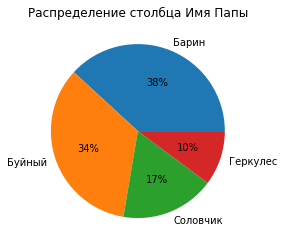

In [176]:
ferma_dad_df['Имя Папы'].value_counts().plot(
    kind= 'pie',
    title= 'Распределение столбца Имя Папы',
    autopct = "%.0f%%",
    ylabel= ""                     
);
plt.show()

Таблица cow_buy_df

In [177]:
cow_buy_df.describe()

,"Жирность,%","Белок,%"
count,20.000000,20.000000
mean,3.577500,3.069500
std,0.126818,0.010339
min,3.340000,3.046000
25%,3.510000,3.064000
50%,3.590000,3.074000
75%,3.650000,3.076000
max,3.770000,3.081000


In [178]:
cow_buy_df.columns

Index(['Порода', 'Тип пастбища', 'порода папы быка', 'Имя Папы', 'Жирность,%',
       'Белок,%', 'Возраст'],
      dtype='object')

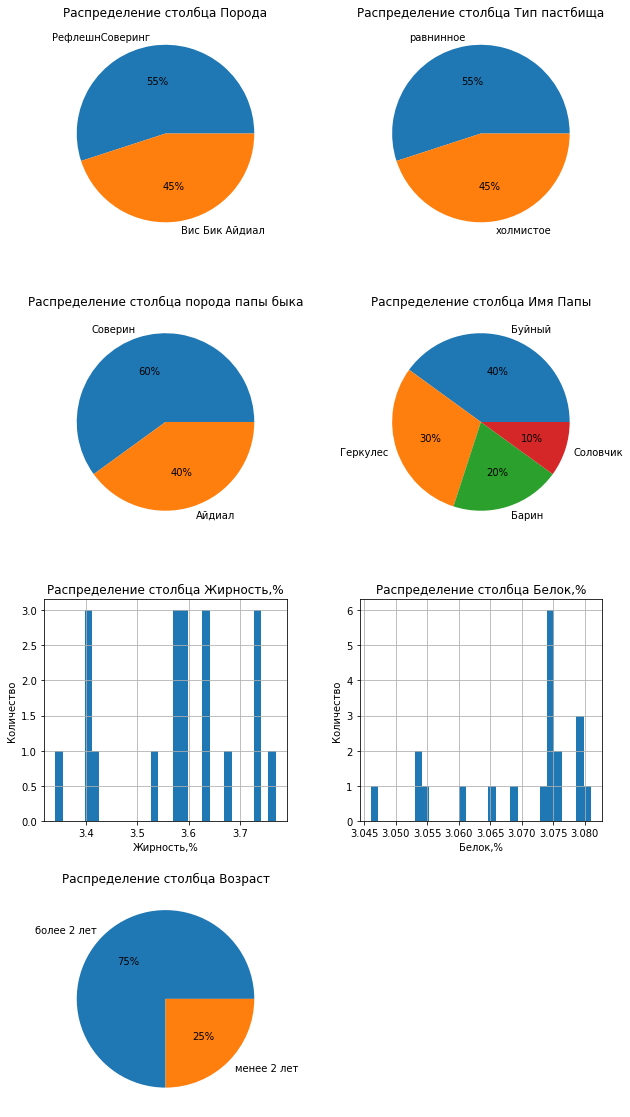

In [179]:
df_columns = cow_buy_df.columns
df_columns_short = [column[:(column.find('(')-1)] \
                           if column.find('(') != -1 else column \
                    for column in df_columns]
categorial_columns = ['Порода', 'Тип пастбища', 
                      'порода папы быка', 'Имя Папы', 'Возраст']
numerical_columns = ['Текущая жирность,%', 'Текущий уровень белка,%']
fig = plt.figure(figsize=(10, 20));
for i, column in enumerate(df_columns):
    if i == 7:
        continue
    plt.subplot(4, 2, i+1)
    if column in categorial_columns:
        cow_buy_df[column].value_counts().plot(
    kind= 'pie',
    title= 'Распределение столбца ' + df_columns_short[i],
    autopct = "%.0f%%",
    ylabel= ""
)
    else:
        plt.hist(cow_buy_df[column], bins=30)
        plt.title('Распределение столбца ' + df_columns_short[i])
        plt.xlabel(column)
        plt.ylabel('Количество')
        plt.grid()
plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show();

В этой таблице нет проблем с выбросами или редкими значениями.

Вывод:

Проведен статистический анализ всех признаков, построены графики для каждого признака. Был удален выброс в столбце `Удой, кг`. Остальные данные не содержат выбросов и редких значений.

## Корреляционный анализ

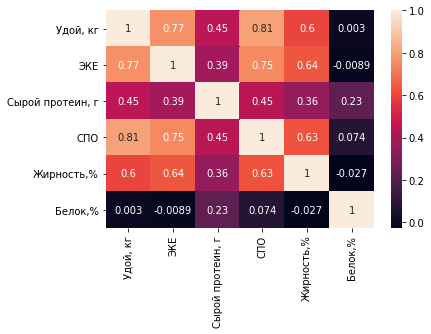

In [180]:
sns.heatmap(ferma_df.drop(columns=['id']).corr(), annot=True);

In [181]:
ferma_df.columns

Index(['id', 'Удой, кг', 'ЭКЕ', 'Сырой протеин, г', 'СПО', 'Порода',
       'Тип пастбища', 'порода папы быка', 'Жирность,%', 'Белок,%',
       'Вкус молока', 'Возраст'],
      dtype='object')

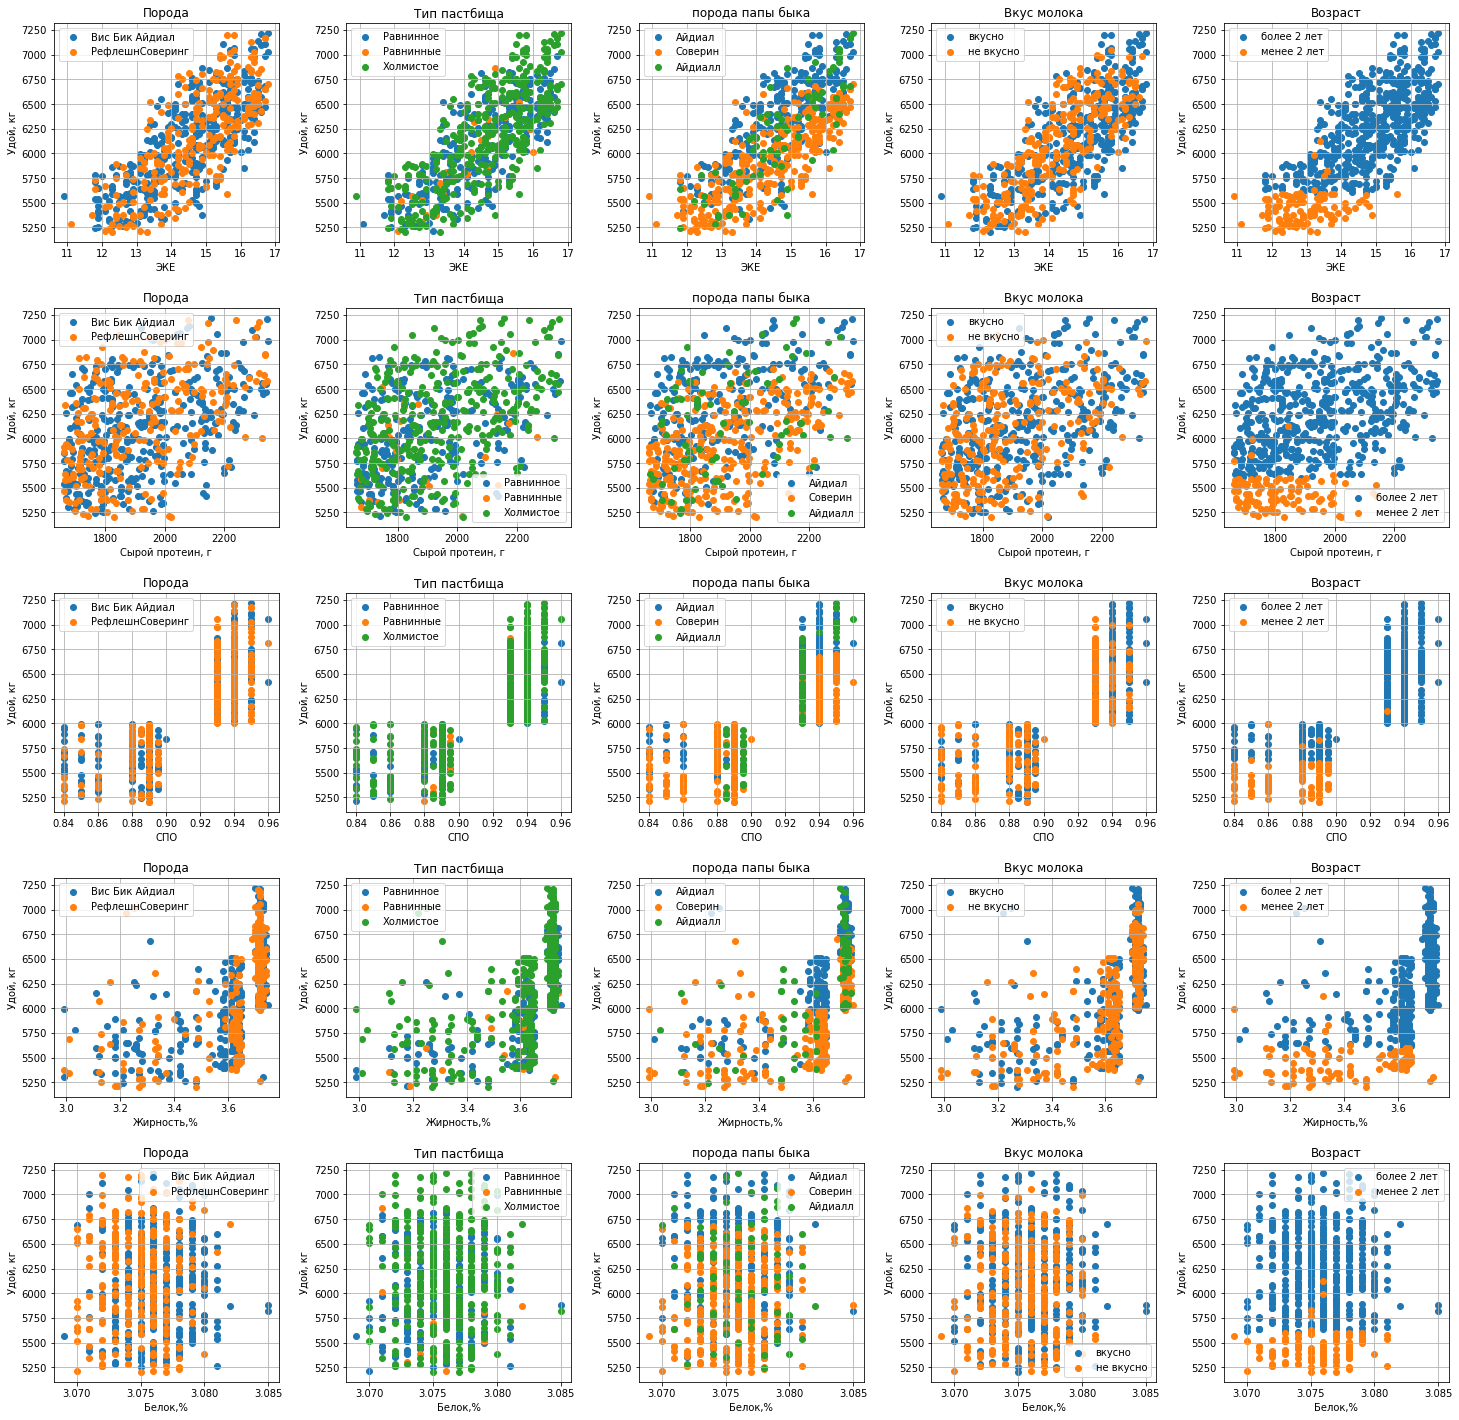

In [182]:
feature_1 = 'Удой, кг'
numerical_features = ['ЭКЕ', 'Сырой протеин, г', 
                      'СПО', 'Жирность,%', 'Белок,%'
                     ]
categorical_features = ['Порода',
       'Тип пастбища', 'порода папы быка',
       'Вкус молока', 'Возраст']
fig = plt.figure(figsize=(25, 25));
for i, feature_2 in enumerate(numerical_features):
    for j, color_feature in enumerate(categorical_features):
        plt.subplot(len(numerical_features), \
            len(categorical_features), \
            i * len(categorical_features) + j + 1)
        unique_values = ferma_df[color_feature].unique()
        plt.title(color_feature)
        plt.xlabel(feature_2)
        plt.ylabel(feature_1)
        for value in unique_values:
            curr_df = ferma_df[ferma_df[color_feature] == value]
            plt.scatter(curr_df[feature_2], curr_df[feature_1], label=value)
        plt.grid()
        plt.legend()
plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()

Выводы:
* Мультиколлинеарность не наблюдается, максимальное значение корреляции в матрице - 0,81.
* `Удой, кг` имеет близкую к 0 корреляцию с `Белок,%`.
* `Удой, кг` умеренно положительно коррелирует с `Сырой протеин, г`(0,45) и `Жирность,%`(0,64). 
* Судя по графику, связи между `Удой, кг` и `Сырой протеин, г` скорее всего нет.
* Между `Удой, кг` и `Жирность,%` связь больше похожа на квадратичную. Можем ввести дополнительную переменную, равную квадрату жирности.
* `Удой, кг` сильно положительно коррелирует с `ЭКЕ`(0,77) и `СПО` (0,81). Первая взаимосвязь похожа на квадратичную, вторая больше похожа на категориальный признак.
* По качественным признакам данные хорошо кластеризуются только для `Возраст` - молодые коровы дают меньше молока, чем взрослые.

In [183]:
ferma_df['Жирность^2,%^2'] = ferma_df['Жирность,%'].apply(lambda x: x**2)

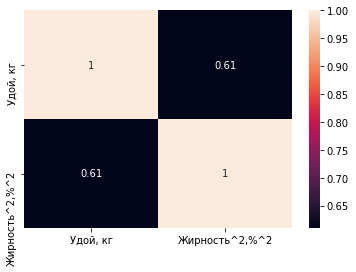

In [184]:
sns.heatmap(ferma_df[['Удой, кг', 'Жирность^2,%^2']].corr(), annot=True);

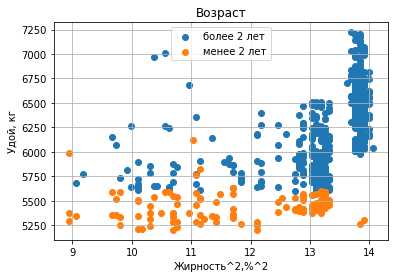

In [185]:
feature_1 = 'Удой, кг'
feature_2 = 'Жирность^2,%^2'
color_feature = 'Возраст'
unique_values = ferma_df[color_feature].unique()
plt.title(color_feature)
plt.xlabel(feature_2)
plt.ylabel(feature_1)
for value in unique_values:
    curr_df = ferma_df[ferma_df[color_feature] == value]
    plt.scatter(curr_df[feature_2], curr_df[feature_1], label=value)
plt.grid()
plt.legend()
plt.show()

Нет, улучшений, т.к. функция квадратичная, но не просто $y = x^2$, нужно подбирать при помощи квадратичной регрессии

Вывод:

Были рассчитаны коэффициенты корреляции между всеми признаками. Были построены диаграммы рассеяния для признака `Удой, кг` и всех остальных количественных признаков, цвета на диаграммах соответсвовали качественным признакам. 

Было выявлено, что целевой признак `Удой, кг` умеренно положительно коррелирует с `Сырой протеин, г` (0,45) и `Жирность,%` (0,64). Удой, кг сильно положительно коррелирует с `ЭКЕ` (0,77) и `СПО` (0,81). Мультиколлинеарность отсутствует, т.к. максимальное значение корреляции в таблице равно 0,81.

При этом из диаграмм рассеяния следует, что близкую к линейной зависимость `Удой, кг` имеет только с `Сырой протеин, г`, с `Жирность,%` и `ЭКЕ` зависимости близки к квадратичным, признак `СПО` сильно кластеризуется, поэтому его можно считать качественным биномиальным.

Из качественных признаков данные кластеризовались только для столбца `Возраст`, однозначно выявляется закономерность - чем больше `Возраст`, тем больше `Удой, кг`.

## Обучение модели линейной регрессии

Функция для прогона модели

Входные параметры:
* датафрейм
* имя целевого столбца
* список имен используемых полей
* числовые столбцы
* категориальные столбцы
* параметр для постоянства разделения на выборки

Выходные параметры:
* $R^2$ метрика
* список остатков
* коэффициенты модели
* точные значения тестовой выборки
* предсказанные значения тестовой выборки
* тренировочная и тестовая выборки
* модель

In [186]:
def linear_model_run(data, target='Удой, кг', list_X=None, num_cols=None, 
              cat_cols=None, random_state=None):
    if list_X != None:
        df = data[list_X]
    X = df.drop(columns=[target])
    y = df[target]
    if random_state == None:
        X_train, X_test, y_train, y_test = train_test_split(X, y)
    else:
        X_train, X_test, y_train, y_test = \
        train_test_split(X, y, random_state=random_state)
    
    X_train_base = X_train.copy()
    X_test_base = X_test.copy()
    y_train_base = y_train.copy()
    y_test_base = y_test.copy()
    
    encoder = OneHotEncoder(sparse=False, drop='first')
    X_train_ohe = encoder.fit_transform(X_train[cat_cols])
    X_test_ohe = encoder.transform(X_test[cat_cols])
    encoder_col_names = encoder.get_feature_names()
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train[num_cols])
    X_test_scaled = scaler.transform(X_test[num_cols])
    
    X_train_ohe = pd.DataFrame(data=X_train_ohe, columns=encoder_col_names)
    X_test_ohe = pd.DataFrame(data=X_test_ohe, columns=encoder_col_names)
    
    X_train_scaled = pd.DataFrame(data=X_train_scaled, columns=num_cols)
    X_test_scaled = pd.DataFrame(data=X_test_scaled, columns=num_cols)
    
    X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
    X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)
    model_lr = LinearRegression()
    model_lr.fit(X_train, y_train)
    y_pred = model_lr.predict(X_test)
    y_true = y_test
    r2 = r2_score(y_true, y_pred)
    residuals = y_true - y_pred
    print('R2 =', r2)
    plt.scatter(y_true, residuals)
    plt.title('Распределение остатков')
    plt.xlabel('Точные значения')
    plt.ylabel('Остатки')
    plt.show()
    add_data = [X_train_base, X_test_base, y_train_base, \
                y_test_base, num_cols, cat_cols]
    return r2, residuals, model_lr.coef_, y_true, y_pred, add_data, model_lr, encoder, scaler

Функция для предсказания значений

Применяет OneHotEncode и скалирование к тестовой выборке и при помощи модели предсказывает значения

In [187]:
def model_predict(model, X_test, encoder, scaler):

    X_test_ohe = encoder.transform(X_test[cat_cols])
    encoder_col_names = encoder.get_feature_names()

    X_test_scaled = scaler.transform(X_test[num_cols])
    
    X_test_ohe = pd.DataFrame(data=X_test_ohe, columns=encoder_col_names)
    
    X_test_scaled = pd.DataFrame(data=X_test_scaled, columns=num_cols)
    
    X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)
    
    result = model.predict(X_test)
    return result

Модель 1

Функция для запуска 1-й модели

In [188]:
def linear_model1_run(model1_df = ferma_df.copy(),
               target1 = 'Удой, кг',
               list_X1 = ['ЭКЕ', 'СПО', 'Жирность,%', \
                          'Сырой протеин, г', 'Возраст', 'Удой, кг'],
               num_cols1 = ['ЭКЕ', 'СПО', 'Жирность,%', 'Сырой протеин, г'],
               cat_cols1 = ['Возраст'],
               random_state=None):
    return linear_model_run(model1_df, target1, list_X1, num_cols1, \
                     cat_cols1, random_state=42)

Запуск 1-й модели

R2 = 0.7480882515267073


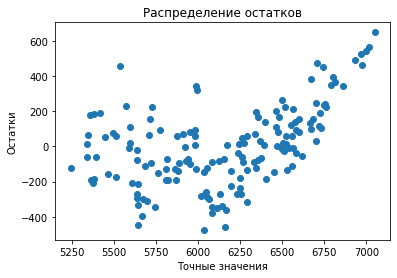

In [189]:
r21, residuals1, coefs1, y_true1, y_pred1, _, _, _, _ = \
        linear_model1_run(random_state=42)

Модель 2

Функция для запуска 2-й модели

In [190]:
def linear_model2_run(model2_df = ferma_df.copy(),
               target2 = 'Удой, кг',
               list_X2 = ['ЭКЕ2', 'СПО bin', 'Жирность,%', \
                          'Сырой протеин, г', 'Возраст', 'Удой, кг'],
               num_cols2 = ['ЭКЕ2', 'СПО bin', 'Жирность,%', 'Сырой протеин, г'],
               cat_cols2 = ['Возраст'],
               random_state=None):
    
    model2_df['СПО bin'] = model2_df['СПО'].apply(lambda x: 1 if x > 0.91 else 0)
    model2_df['ЭКЕ2'] = model2_df['ЭКЕ'].apply(lambda x: x**2)
    
    return linear_model_run(model2_df, target2, list_X2, num_cols2, \
                     cat_cols2, random_state=42)

Датафрейм для 2-й модели

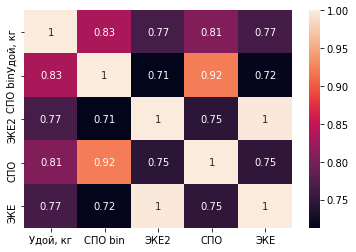

In [191]:
model2_df = ferma_df.copy()
model2_df['СПО bin'] = model2_df['СПО'].apply(lambda x: 1 if x > 0.91 else 0)
model2_df['ЭКЕ2'] = model2_df['ЭКЕ'].apply(lambda x: x**2)
sns.heatmap(model2_df[['Удой, кг', 'СПО bin', 'ЭКЕ2', 'СПО', 'ЭКЕ']].corr(), annot=True);
plt.show()

Запуск 2-й модели

R2 = 0.7931276123548623


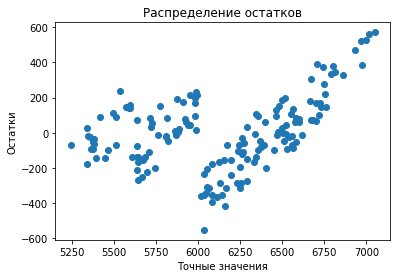

In [192]:
r22, residuals2, coefs2, y_true2, y_pred2, _, _, _, _ = \
                linear_model2_run(random_state=42)

Модель 3

Датафрейм для 3-й модели

In [193]:
model3_df = pd.merge(model2_df.copy(), ferma_dad_df, on='id', how='left')
display(model3_df.head(3))
display(model3_df.isna().sum())

,id,"Удой, кг",ЭКЕ,"Сырой протеин, г",СПО,Порода,Тип пастбища,порода папы быка,"Жирность,%","Белок,%",Вкус молока,Возраст,"Жирность^2,%^2",СПО bin,ЭКЕ2,Имя Папы
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более 2 лет,12.8164,0,201.64,Буйный
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее 2 лет,12.5316,0,163.84,Соловчик
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более 2 лет,12.8881,0,196.00,Барин


id                  0
Удой, кг            0
ЭКЕ                 0
Сырой протеин, г    0
СПО                 0
Порода              0
Тип пастбища        0
порода папы быка    0
Жирность,%          0
Белок,%             0
Вкус молока         0
Возраст             0
Жирность^2,%^2      0
СПО bin             0
ЭКЕ2                0
Имя Папы            0
dtype: int64

Поле присоединилось, пропусков нет

Функция для запуска 3-й модели

In [194]:
def linear_model3_run(model3_df = ferma_df.copy(),
              target3 = 'Удой, кг',
              list_X3 = ['ЭКЕ2', 'СПО bin', 'Жирность,%', \
                         'Сырой протеин, г', 'Возраст', 'Удой, кг', 'Имя Папы'],
              num_cols3 = ['ЭКЕ2', 'Жирность,%', 'Сырой протеин, г'],
              cat_cols3 = ['Возраст', 'Имя Папы', 'СПО bin'],
              random_state=None
              ):
    
    model3_df['СПО bin'] = model3_df['СПО'].apply(lambda x: 1 if x > 0.91 else 0)
    model3_df['ЭКЕ2'] = model3_df['ЭКЕ'].apply(lambda x: x**2)
    model3_df = pd.merge(model3_df.copy(), ferma_dad_df, on='id', how='left')
    
    return linear_model_run(model3_df, target3, list_X3, num_cols3, cat_cols3, random_state=42)

Запуск 3-й модели

R2 = 0.8180168126292111


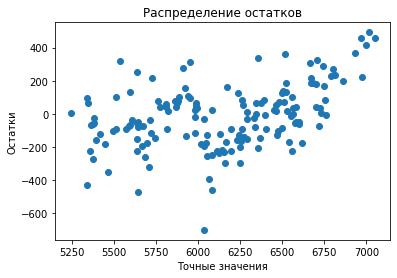

In [195]:
r23, residuals3, coefs3, y_true3, y_pred3, _, _, _, _ = \
linear_model3_run(random_state=42)

Визуализация остатков моделей:
* Слева на 1-м графике - остатки трёх моделей сразу.
* Слева на 2-4-х графиках - остатки каждой из трёх моделей.
* Справа на графиках - распределение остатков моделей и их аппроксимация нормальным распределением.

Метрика R2 моделей:
R2 1-й модели = 0.7480882515267073
R2 2-й модели = 0.7931276123548623
R2 3-й модели = 0.8180168126292111


/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

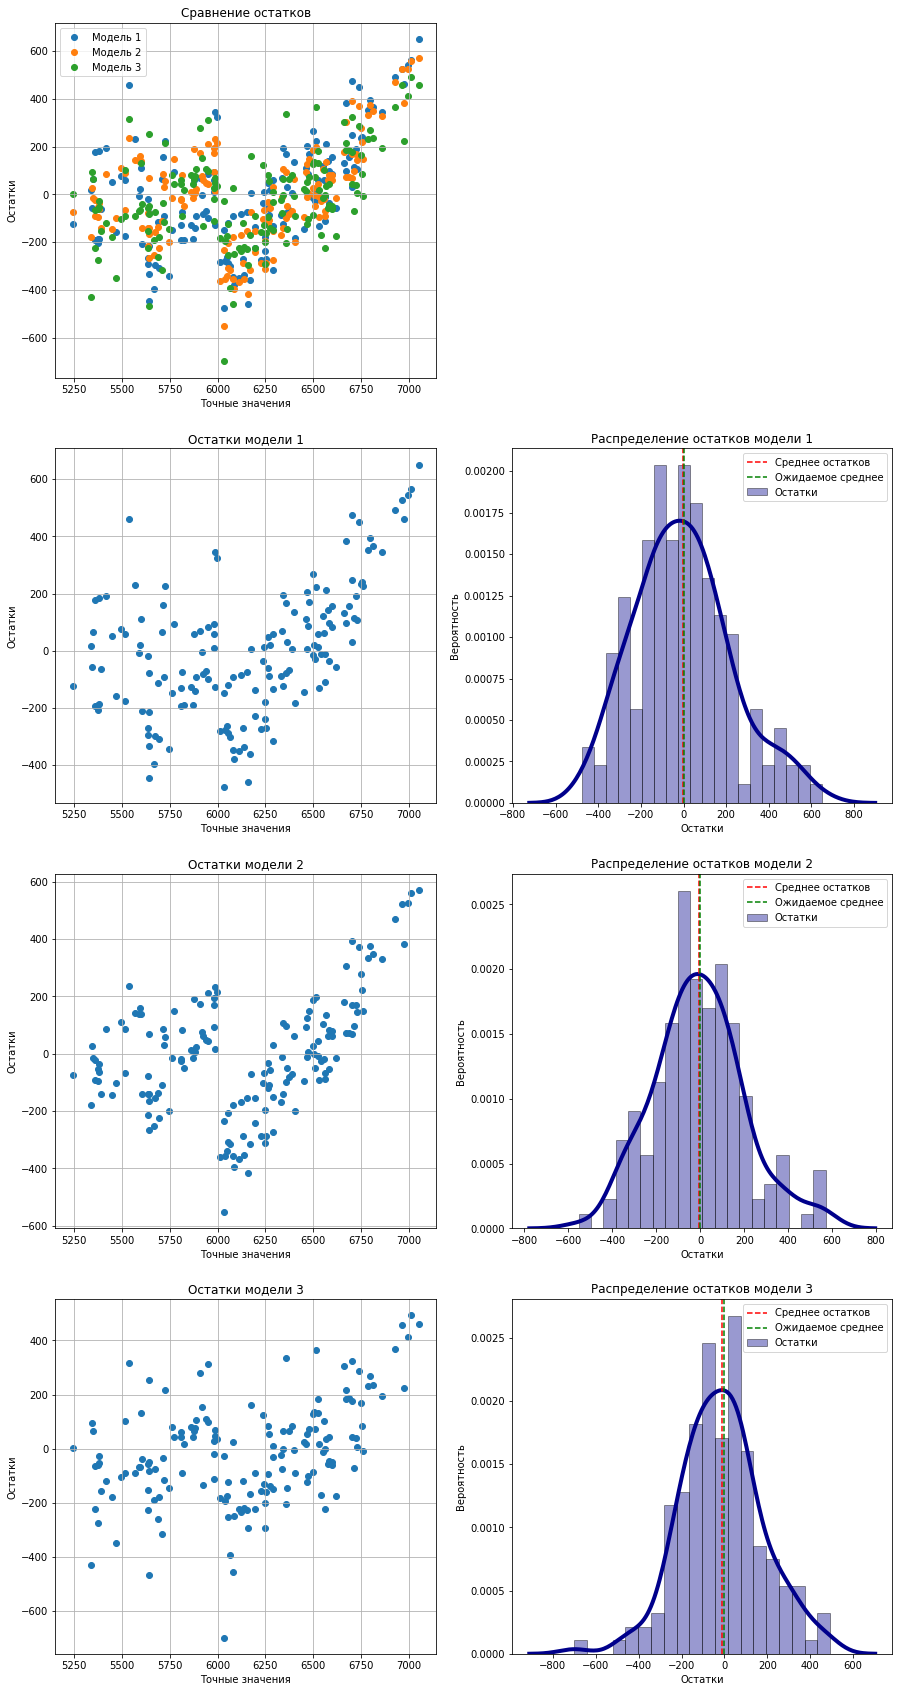

In [196]:
print('Метрика R2 моделей:')
print('R2 1-й модели =', r21)
print('R2 2-й модели =', r22)
print('R2 3-й модели =', r23)
fig = plt.figure(figsize=(15, 30))
plt.subplot(4, 2, 1)
plt.scatter(y_true1, residuals1, label='Модель 1')
plt.scatter(y_true2, residuals2, label='Модель 2')
plt.scatter(y_true3, residuals3, label='Модель 3')
plt.title('Сравнение остатков')
plt.xlabel('Точные значения')
plt.ylabel('Остатки')
plt.legend()
plt.grid()

plt.subplot(4, 2, 3)
plt.scatter(y_true1, residuals1, label='Модель 1')
plt.title('Остатки модели 1')
plt.xlabel('Точные значения')
plt.ylabel('Остатки')
plt.grid()

plt.subplot(4, 2, 4)
#plt.hist(residuals1, bins=20, label='Остатки')
sns.distplot(residuals1, hist=True, kde=True, 
             bins=20, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4},
             label='Остатки')
plt.axvline(sum(residuals1)/len(residuals1), \
            color='r', linestyle='--',label='Среднее остатков')
plt.axvline(0, \
            color='g', linestyle='--',label='Ожидаемое среднее')
plt.title('Распределение остатков модели 1')
plt.xlabel('Остатки')
plt.ylabel('Вероятность')
plt.legend()

plt.subplot(4, 2, 5)
plt.scatter(y_true2, residuals2, label='Модель 2')
plt.title('Остатки модели 2')
plt.xlabel('Точные значения')
plt.ylabel('Остатки')
plt.grid()

plt.subplot(4, 2, 6)
#plt.hist(residuals2, bins=20, label='Остатки')
sns.distplot(residuals2, hist=True, kde=True, 
             bins=20, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4},
             label='Остатки')
plt.axvline(sum(residuals2)/len(residuals2), \
            color='r', linestyle='--',label='Среднее остатков')
plt.axvline(0, \
            color='g', linestyle='--',label='Ожидаемое среднее')
plt.title('Распределение остатков модели 2')
plt.xlabel('Остатки')
plt.ylabel('Вероятность')
plt.legend()

plt.subplot(4, 2, 7)
plt.scatter(y_true3, residuals3, label='Модель 3')
plt.title('Остатки модели 3')
plt.xlabel('Точные значения')
plt.ylabel('Остатки')
plt.grid()

plt.subplot(4, 2, 8)
#plt.hist(residuals3, bins=20, label='Остатки')
sns.distplot(residuals3, hist=True, kde=True, 
             bins=20, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4},
             label='Остатки')
plt.axvline(sum(residuals3)/len(residuals3), \
            color='r', linestyle='--',label='Среднее остатков')
plt.axvline(0, \
            color='g', linestyle='--',label='Ожидаемое среднее')
plt.title('Распределение остатков модели 3')
plt.xlabel('Остатки')
plt.ylabel('Вероятность')
plt.legend()

plt.show()

По метрике $R^2$ лучшей оказалась модель 3.

Гистограмма распределения остатков симметрична, визуально похожа на нормальное распределение.

При точных значениях от 5250 до 6750 остатки лежат в пределах от -400 до 400, при больших значениях у всех трёх моделей идет завышение предсказаний - остатки от 200 до 600.

Рассчет метрик MSE, MAE, RMSE для всех трёх моделей

In [197]:
y_true_list = [y_true1, y_true2, y_true3]
y_pred_list = [y_pred1, y_pred2, y_pred3]
MSE_list = []
MAE_list = []
RMSE_list = []
for i in range(len(y_true_list)):
    MSE_list.append(mean_squared_error(y_true_list[i], y_pred_list[i]))
    MAE_list.append(mean_absolute_error(y_true_list[i], y_pred_list[i]))
    RMSE_list.append(mean_squared_error(y_true_list[i], y_pred_list[i], squared=False))
    print(f'Метрики {i+1}-й модели:\nMSE={MSE_list[i]:0.2f}\nMAE={MAE_list[i]:0.2f}\nRMSE={RMSE_list[i]:0.2f}\n')

Метрики 1-й модели:
MSE=51280.41
MAE=179.46
RMSE=226.45

Метрики 2-й модели:
MSE=42111.97
MAE=159.62
RMSE=205.21

Метрики 3-й модели:
MSE=37045.40
MAE=149.42
RMSE=192.47



Наименьшее значение по всем трёх метрикам имеет 3-я модель, её и назовём лучшей.

Рассчет квантилей

Я не очень понял, что именно нужно сделать в этом пункте. Как мы хотим рассчитать квантили, не зная распределения? Можем много раз запустить модель для случайного разбиения данных на тестовую и обучающую выборки и получить выборочное распределение, по котором можем приближенно рассчитать квантили.

Из формулировки не очень понятно, квантили для чего именно нужно найти.
* Для точности модели. Т.е., как я уже описал выше, мы можем много раз прогнать модель на данных, по-разному разбивая их на тренировочную и тестовую выборки и получить оценки квантилей. В итоге получаем доверительный интервал для точности модели, а, соответственно, и для вероятности ошибки тоже.
* Для остатков. Зная выборочное распределение остатков можем вычислить оценки квантилей.

Я написал для остатков

Запуск лучшей модели

R2 = 0.8180168126292111


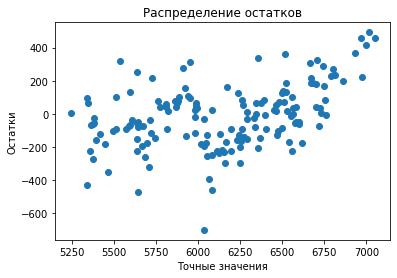

In [198]:
r2, residuals, coefs, y_true, y_pred, add_data, model, encoder, scaler = \
linear_model3_run(random_state=42)
X_train = add_data[0]
y_train = add_data[2]
num_cols = add_data[4]
cat_cols = add_data[5]

Предсказание на тренировочных данных

R2 = 0.8523170184083018


/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


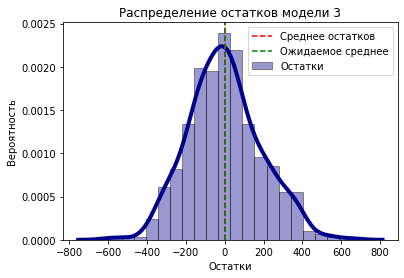

In [199]:
y_train_pred = model_predict(model, X_train, encoder, scaler)
residuals_train = y_train - y_train_pred
print('R2 =', r2_score(y_train, y_train_pred))
sns.distplot(residuals_train, hist=True, kde=True, 
             bins=20, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4},
             label='Остатки')
plt.axvline(sum(residuals_train)/len(residuals_train), \
            color='r', linestyle='--',label='Среднее остатков')
plt.axvline(0, \
            color='g', linestyle='--',label='Ожидаемое среднее')
plt.title('Распределение остатков модели 3')
plt.xlabel('Остатки')
plt.ylabel('Вероятность')
plt.legend()

plt.show()

Рассчитаем, например, 95%-й доверительный интервал.

In [200]:
interval_percentage = 95
eps = (100 - interval_percentage) / 200
residuals_sorted = sorted(list(residuals_train))
left_quantile = 0
right_quantile = 0
for i in range(1, len(residuals_sorted)+1):
    if i/len(residuals_sorted) < eps:
        continue
    else:
        left_quantile = (residuals_sorted[i] + residuals_sorted[i+1])/2
        break
        
for i in range(len(residuals_sorted), 0, -1):
    if i/len(residuals_sorted) > 1 - eps:
        continue
    else:
        right_quantile = (residuals_sorted[i] + residuals_sorted[i+1])/2
        break
print('Правая квантиль =', right_quantile)
print('Левая квантиль =', left_quantile)

Правая квантиль = 380.18379512306274
Левая квантиль = -329.1497967258824


Прогнозирование удоя для коров из `cow_buy.csv`

Запуск 3-й модели

R2 = 0.8180168126292111


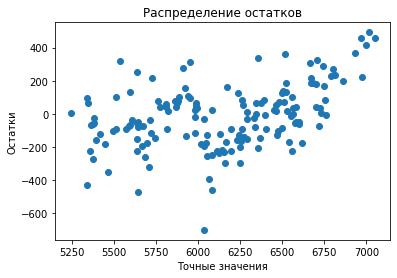

In [260]:
r2, residuals, coefs, y_true, y_pred, add_data, model, encoder, scaler = \
linear_model3_run(random_state=42)
X_train = add_data[0]
y_train = add_data[2]

Создание столбцов `ЭКЕ`, `Сырой протеин, г` и `СПО` и заполнение их 1.05 * среднее значение

In [261]:
display(cow_buy_df)
print(len(cow_buy_df))
X_test = cow_buy_df.copy()
new_features = ['ЭКЕ', 'Сырой протеин, г', 'СПО']
mean_features = [ferma_df[feature].mean()*1.05 for feature in new_features]

for i, feature in enumerate(new_features):
    X_test[feature] = pd.Series([mean_features[i] \
                                   for j in range(cow_buy_df.shape[0])])


,Порода,Тип пастбища,порода папы быка,Имя Папы,"Жирность,%","Белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более 2 лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее 2 лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более 2 лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более 2 лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более 2 лет
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.63,3.053,менее 2 лет
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более 2 лет
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более 2 лет
8,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более 2 лет
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее 2 лет


20


Создание нелинейных столбцов

In [262]:
X_test['СПО bin'] = X_test['СПО'].apply(lambda x: 1 if x > 0.91 else 0)
X_test['ЭКЕ2'] = X_test['ЭКЕ'].apply(lambda x: x**2)
X_test = X_test.rename(columns={'Текущая жирность,%' : 'Жирность,%' 
                               })
X_test = X_test.drop(columns=['Порода', 'Тип пастбища', 'порода папы быка'])

In [263]:
display(X_test)

,Имя Папы,"Жирность,%","Белок,%",Возраст,ЭКЕ,"Сырой протеин, г",СПО,СПО bin,ЭКЕ2
0,Геркулес,3.58,3.076,более 2 лет,15.276162,2019.947532,0.958744,1,233.361138
1,Буйный,3.54,3.081,менее 2 лет,15.276162,2019.947532,0.958744,1,233.361138
2,Барин,3.59,3.074,более 2 лет,15.276162,2019.947532,0.958744,1,233.361138
3,Буйный,3.40,3.061,более 2 лет,15.276162,2019.947532,0.958744,1,233.361138
4,Буйный,3.64,3.074,более 2 лет,15.276162,2019.947532,0.958744,1,233.361138
5,Геркулес,3.63,3.053,менее 2 лет,15.276162,2019.947532,0.958744,1,233.361138
6,Геркулес,3.58,3.076,более 2 лет,15.276162,2019.947532,0.958744,1,233.361138
7,Буйный,3.57,3.079,более 2 лет,15.276162,2019.947532,0.958744,1,233.361138
8,Барин,3.59,3.074,более 2 лет,15.276162,2019.947532,0.958744,1,233.361138
9,Буйный,3.40,3.079,менее 2 лет,15.276162,2019.947532,0.958744,1,233.361138


Предсказание модели и вывод результата

In [265]:
udoy_pred = model_predict(model, X_test, encoder, scaler)

display(udoy_pred)

array([6559.75398049, 6357.92640449, 6288.07942391, 6515.48310038,
       6559.32190196, 6385.757734  , 6559.75398049, 6546.53558483,
       6288.07942391, 6332.35377023, 6322.74950036, 6587.15323147,
       6578.02014781, 6073.89760931, 6288.07942391, 6515.48310038,
       6322.74950036, 6411.33036826, 6504.52339998, 6559.32190196])

Вывод:

Были обучены 3 модели простой линейной регрессии. 
* В первой модели предполагалась линейная зависимость от признаков, наиболее скоррелированных с целевым.
* Во второй модели набор признаков был изменен в соответсвии с выводами из предыдущего пункта: `СПО`->`СПО bin`, `ЕКЭ`->`ЕКЭ2`
* В третьей модели был добавлен признак `Имя Папы`

В процессе обучения каждой из моделей:
* Данные были разбиты на тренировочную и тестовую выборки
* Качественные признаки были закодированы с помощью `OneHotEncoder`
* Количественные признаки были масштабированы с помощью `StandardScaler`
* Для оценки качества модели использовались метрика $R^2$ и распределение остатков модели

Наилучшее моделью по метрике $R^2$, близости распределения остатков к нормальному и постоянству дисперсии остатков оказалась модель номер 3.

По метрикам MSE, MAE и RMSE наилучшей моделью также оказалась модель номер 3.

Был построен 95%-й доверительный интервал для остатков прогноза модели (-326.5, 378.25). С учетом среднего значения удоя в 6200 кг это хороший результат.

Был спрогнозирован удой коров из таблицы `cow_buy.csv`.

## Обучение модели логистической регрессии

In [206]:
def logistic_model_run(data=None, target='Вкус молока', list_X=None, 
                       num_cols=None, cat_cols=None, random_state=None):
    if set(data[target].unique()) != set([0, 1]):
            data[target] = data[target]\
            .apply(lambda x: 1 if x == 'вкусно' else 0)
    if list_X != None:
        df = data[list_X]
    else:
        df = copy.deepcopy(data)
    X = df.drop(columns=[target])
    y = df[target]
    if random_state == None:
        X_train, X_test, y_train, y_test = train_test_split(X, y)
    else:
        X_train, X_test, y_train, y_test = \
        train_test_split(X, y, random_state=random_state)
    
    X_train_base = X_train.copy()
    X_test_base = X_test.copy()
    y_train_base = y_train.copy()
    y_test_base = y_test.copy()
    
    encoder = OneHotEncoder(sparse=False, drop='first')
    X_train_ohe = encoder.fit_transform(X_train[cat_cols])
    X_test_ohe = encoder.transform(X_test[cat_cols])
    encoder_col_names = encoder.get_feature_names()
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train[num_cols])
    X_test_scaled = scaler.transform(X_test[num_cols])
    
    X_train_ohe = pd.DataFrame(data=X_train_ohe, columns=encoder_col_names)
    X_test_ohe = pd.DataFrame(data=X_test_ohe, columns=encoder_col_names)
    
    X_train_scaled = pd.DataFrame(data=X_train_scaled, columns=num_cols)
    X_test_scaled = pd.DataFrame(data=X_test_scaled, columns=num_cols)
    
    X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
    X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)
    
    model_lr = LogisticRegression()
    model_lr.fit(X_train, y_train)
    y_pred = model_lr.predict(X_test)
    y_proba = model_lr.predict_proba(X_test)
    y_true = y_test
    accuracy = accuracy_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    cm = confusion_matrix(y_true, y_pred)
    print('accuracy =', accuracy)
    print('recall =', recall)
    print('precision =', precision)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
    plt.ylabel('True label')
    plt.xlabel('Predicted'); 
    add_data = [X_train_base, X_test_base, y_train_base, y_test_base]
    return y_true, y_pred, y_proba[:, 1], accuracy, recall, precision, \
cm, add_data, model_lr, encoder, scaler

Лучшая модель

In [207]:
ferma_df.head(3)

,id,"Удой, кг",ЭКЕ,"Сырой протеин, г",СПО,Порода,Тип пастбища,порода папы быка,"Жирность,%","Белок,%",Вкус молока,Возраст,"Жирность^2,%^2"
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более 2 лет,12.8164
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее 2 лет,12.5316
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более 2 лет,12.8881


In [208]:
ferma_df.columns

Index(['id', 'Удой, кг', 'ЭКЕ', 'Сырой протеин, г', 'СПО', 'Порода',
       'Тип пастбища', 'порода папы быка', 'Жирность,%', 'Белок,%',
       'Вкус молока', 'Возраст', 'Жирность^2,%^2'],
      dtype='object')

In [232]:
def logistic_model3_run(
              model3_df = ferma_df.copy(),
              target3 = 'Вкус молока',
              list_X3 = ['ЭКЕ2', 'СПО bin', 'Жирность^2,%^2',\
                         'Сырой протеин, г', 'Возраст', 'Вкус молока', 'Имя Папы'],
              num_cols3 = ['ЭКЕ2', 'Жирность^2,%^2', 'Сырой протеин, г'],
              cat_cols3 = ['Возраст', 'Имя Папы', 'СПО bin'],
              random_state=None
              ):

    model3_df['СПО bin'] = model3_df['СПО'].apply(lambda x: 1 if x > 0.91 else 0)
    model3_df['ЭКЕ2'] = model3_df['ЭКЕ'].apply(lambda x: x**2)
    model3_df = pd.merge(model3_df.copy(), ferma_dad_df, on='id', how='left')
    
    return logistic_model_run(model3_df, target3, list_X3, num_cols3, cat_cols3, random_state=42)

accuracy = 0.6369426751592356
recall = 0.8636363636363636
precision = 0.628099173553719


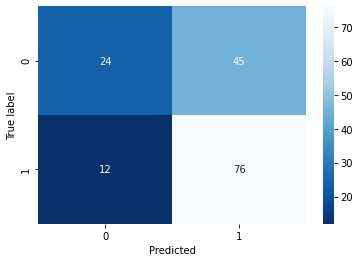

In [233]:
y_true, y_pred, y_proba, accuracy, recall, \
precision, cm, add_data, model_lr, encoder, scaler = \
logistic_model3_run(random_state=42)

Раз для заказчика главное - `вкусное молоко`, то наиболее критичная для нас `ошибка 1-го рода`, т.е. смотрим на метрику `precision`. Она будет означать долю коров со вкусным молоком, из тех коров, про которых мы заключили, что их молоко вкусное. `Ошибка 2-го рода`, т.е. ситуация когда мы не рассмотрели корову со `вкусным молоком` нас мало волнует, т.к. хотим максимизировать долю коров со `вкусным молоком` среди купленных.

Выбираем метрику `precision`

Варьируем порог классификации

Формируем датасет с парами точный класс - вероятность принадлежности

In [234]:
y_test = y_true
y_proba = y_proba
data = pd.DataFrame(zip(y_test, y_proba),
             columns = ['y_valid', 'y_proba'])\
.sort_values(by='y_proba',ascending=False)
display(data.head()) 

,y_valid,y_proba
85,1,0.852330
114,1,0.841524
19,1,0.832477
8,1,0.831797
39,1,0.830730


Пороги классификации

In [235]:
thresholds = [round(i,2) for i in np.linspace(0.1, 1, num = 12, endpoint=False)]

Предсказанные значения для разных порогов

In [236]:
columns = []

for i in thresholds:
    columns.append('y_pred_'+str(i))
    data['y_pred_'+str(i)] = data['y_proba'].apply(lambda x: 1 if x >= i else 0)
    
display(data.sample(5))

,y_valid,y_proba,y_pred_0.1,y_pred_0.18,y_pred_0.25,y_pred_0.32,y_pred_0.4,y_pred_0.48,y_pred_0.55,y_pred_0.62,y_pred_0.7,y_pred_0.77,y_pred_0.85,y_pred_0.92
121,1,0.651664,1,1,1,1,1,1,1,1,0,0,0,0
114,1,0.841524,1,1,1,1,1,1,1,1,1,1,0,0
155,0,0.696555,1,1,1,1,1,1,1,1,0,0,0,0
72,1,0.618540,1,1,1,1,1,1,1,0,0,0,0,0
13,1,0.801776,1,1,1,1,1,1,1,1,1,1,0,0


Рассчет precision и recall для разных порогов

In [237]:
precision_df = pd.DataFrame(data={}, \
                columns=['Порог', 'precision', 'recall', 'TN', 'FN', 'FP', 'TP'])

for i in thresholds:
    TN = data[(data['y_pred_'+str(i)] == 0) \
              & (data['y_valid'] == 0)].count()['y_valid']
    FN = data[(data['y_pred_'+str(i)] == 0) \
              & (data['y_valid'] == 1)].count()['y_valid']
    FP = data[(data['y_pred_'+str(i)] == 1) \
              & (data['y_valid'] == 0)].count()['y_valid']
    TP = data[(data['y_pred_'+str(i)] == 1) \
              & (data['y_valid'] == 1)].count()['y_valid']
    precision = TP / (TP + FP)
    recall = TP / (TP + FN)
    new_row = {'Порог':i, 'precision':precision, 'recall':recall, 'TN':TN, \
               'FN':FN, 'FP':FP, 'TP':TP}
    precision_df = precision_df.append(new_row, ignore_index=True)
display(precision_df)

/tmp/ipykernel_31/2695399860.py:13: RuntimeWarning: invalid value encountered in long_scalars
  precision = TP / (TP + FP)


,Порог,precision,recall,TN,FN,FP,TP
0,0.10,0.560510,1.000000,0.0,0.0,69.0,88.0
1,0.18,0.560510,1.000000,0.0,0.0,69.0,88.0
2,0.25,0.560510,1.000000,0.0,0.0,69.0,88.0
3,0.32,0.557692,0.988636,0.0,1.0,69.0,87.0
4,0.40,0.565789,0.977273,3.0,2.0,66.0,86.0
5,0.48,0.598425,0.863636,18.0,12.0,51.0,76.0
6,0.55,0.663551,0.806818,33.0,17.0,36.0,71.0
7,0.62,0.696203,0.625000,45.0,33.0,24.0,55.0
8,0.70,0.733333,0.375000,57.0,55.0,12.0,33.0
9,0.77,0.736842,0.159091,64.0,74.0,5.0,14.0


Можем видеть, что при пороге классификации в 0.85 `precision` = 1, т.е. все выбранные коровы будут со `вкусным` молоком (хоть такая корова всего одна).

Можем уточнить этот порог в надежде, что таких коров станет больше.

In [238]:
thresholds = [round(i,3) for i in \
              np.linspace(0.77, 0.85, num = 50, endpoint=False)]

columns = []

for i in thresholds:
    columns.append('y_pred_'+str(i))
    data['y_pred_'+str(i)] = data['y_proba'].apply(lambda x: 1 if x >= i else 0)
    
precision_df = pd.DataFrame(data={}, \
                columns=['Порог', 'precision', 'recall', 'TN', 'FN', 'FP', 'TP'])

for i in thresholds:
    TN = data[(data['y_pred_'+str(i)] == 0) \
              & (data['y_valid'] == 0)].count()['y_valid']
    FN = data[(data['y_pred_'+str(i)] == 0) \
              & (data['y_valid'] == 1)].count()['y_valid']
    FP = data[(data['y_pred_'+str(i)] == 1) \
              & (data['y_valid'] == 0)].count()['y_valid']
    TP = data[(data['y_pred_'+str(i)] == 1) \
              & (data['y_valid'] == 1)].count()['y_valid']
    precision = TP / (TP + FP)
    recall = TP / (TP + FN)
    new_row = {'Порог':i, 'precision':precision, 'recall':recall, 'TN':TN, \
               'FN':FN, 'FP':FP, 'TP':TP}
    precision_df = precision_df.append(new_row, ignore_index=True)
display(precision_df)

,Порог,precision,recall,TN,FN,FP,TP
0,0.770,0.736842,0.159091,64.0,74.0,5.0,14.0
1,0.772,0.736842,0.159091,64.0,74.0,5.0,14.0
2,0.773,0.736842,0.159091,64.0,74.0,5.0,14.0
3,0.775,0.722222,0.147727,64.0,75.0,5.0,13.0
4,0.776,0.722222,0.147727,64.0,75.0,5.0,13.0
5,0.778,0.722222,0.147727,64.0,75.0,5.0,13.0
6,0.780,0.705882,0.136364,64.0,76.0,5.0,12.0
7,0.781,0.705882,0.136364,64.0,76.0,5.0,12.0
8,0.783,0.705882,0.136364,64.0,76.0,5.0,12.0
9,0.784,0.750000,0.136364,65.0,76.0,4.0,12.0


Из данной таблицы можем сделать вывод, что начиная с порога 0.797 все молоко коров, классифицированное как `вкусное`, дейтсвительно окажется `вкусным`, таких коров 10.

При этом значения метрики `recall` оказывается очень низким (0.11), что неудивительно, ведь почти всех коров со `вкусным` молоком мы приписали к коровам с `не вкусным`.

Прогнозируем вкус коров из `cow_buy.csv`

In [239]:
threshold = 0.794

accuracy = 0.6369426751592356
recall = 0.8636363636363636
precision = 0.628099173553719


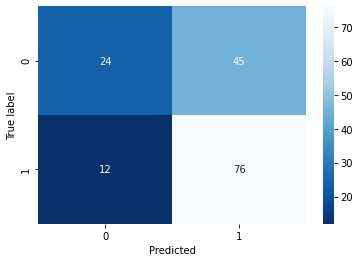

In [244]:
_, _, y_proba, _, _, _, _, _, model, encoder, scaler = \
logistic_model3_run(random_state=42)

In [250]:
def model_predict_proba(model, X_test, encoder, scaler):

    X_test_ohe = encoder.transform(X_test[cat_cols])
    encoder_col_names = encoder.get_feature_names()

    X_test_scaled = scaler.transform(X_test[num_cols])
    
    X_test_ohe = pd.DataFrame(data=X_test_ohe, columns=encoder_col_names)
    
    X_test_scaled = pd.DataFrame(data=X_test_scaled, columns=num_cols)
    
    X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)
    
    result = model.predict_proba(X_test)[:, 1]
    return result

In [251]:
X_test = cow_buy_df.copy()
new_features = ['ЭКЕ', 'Сырой протеин, г', 'СПО']
mean_features = [ferma_df[feature].mean()*1.05 for feature in new_features]

for i, feature in enumerate(new_features):
    X_test[feature] = pd.Series([mean_features[i] \
                                   for j in range(cow_buy_df.shape[0])])

X_test['СПО bin'] = X_test['СПО'].apply(lambda x: 1 if x > 0.91 else 0)
X_test['ЭКЕ2'] = X_test['ЭКЕ'].apply(lambda x: x**2)
X_test = X_test.rename(columns={'Текущая жирность,%' : 'Жирность,%' 
                               })
X_test = X_test.drop(columns=['Порода', 'Тип пастбища', 'порода папы быка'])

In [252]:
y_proba_predicted = model_predict_proba(model, X_test, encoder, scaler)

In [254]:
y_proba_predicted

array([0.76112872, 0.75653446, 0.8077482 , 0.79778528, 0.79528135,
       0.7162498 , 0.76112872, 0.79601403, 0.8077482 , 0.75819064,
       0.71386284, 0.75936867, 0.75995633, 0.77147594, 0.8077482 ,
       0.79778528, 0.71386284, 0.71441456, 0.79840768, 0.79528135])

In [255]:
tasty_pred = [1 if y_pr > threshold else 0 for y_pr in y_proba_predicted]
print(y_pred)

[0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1]


Вывод:
    
Были обучены 3 модели логистической регрессии регрессии. 
* В первой модели испоьзовались исходные признаки, наиболее скоррелированных с целевым.
* Во второй модели набор признаков был изменен в соответсвии с выводами из предыдущего пункта: `СПО`->`СПО bin`, `ЕКЭ`->`ЕКЭ2`
* В третьей модели был добавлен признак `Имя Папы`

В процессе обучения каждой из моделей:
* Данные были разбиты на тренировочную и тестовую выборки
* Качественные признаки были закодированы с помощью `OneHotEncoder`
* Количественные признаки были масштабированы с помощью `StandardScaler`
* Для оценки качества модели использовались метрики accuracy, recall, precision и построена матрица ошибок.

Для выбора наилучшей модели была выбрана метрика precision (т.е. наиболее критичной оказалась ошибка 1-го рода), т.к. именно она отвечает требованиям заказчика. 

Наилучшее моделью по метрике precision оказалась модель номер 3.

При помощи изменения порога классификации ошибка 1-го рода была сведена к 0, т.е. метрика precision стала равна 1. При этом порог классификации был 0.797, метрика recall равна 0.11, а коров, чем молоко является вкусным и мы можем это предсказать, оказалось равным 10.

Был спрогнозирован вкус молока коров из таблицы `cow_buy.csv`.

## Итоговые выводы

Выводы:
1. Была проведена загрузка данных, названия столбцов и категориальные значения были приведены к единообразному виду.
2. Была проведена предобработка данных, были удалены явные дупликаты и пропуски в данных. Числовые данные были приведены к числовому типу.
3. Проведен статистический анализ всех признаков, построены графики для каждого признака. Был удален выброс в столбце `Удой, кг`. Остальные данные не содержат выбросов и редких значений.
4. Были рассчитаны коэффициенты корреляции между всеми признаками. Были построены диаграммы рассеяния для признака `Удой, кг` и всех остальных количественных признаков, цвета на диаграммах соответсвовали качественным признакам. 
* Было выявлено, что целевой признак `Удой, кг` умеренно положительно коррелирует с `Сырой протеин, г` (0,45) и `Жирность,%` (0,64). Удой, кг сильно положительно коррелирует с `ЭКЕ` (0,77) и `СПО` (0,81). Мультиколлинеарность отсутствует, т.к. максимальное значение корреляции в таблице равно 0,81.
* При этом из диаграмм рассеяния следует, что близкую к линейной зависимость `Удой, кг` имеет только с `Сырой протеин, г`, с `Жирность,%` и `ЭКЕ` зависимости близки к квадратичным, признак `СПО` сильно кластеризуется, поэтому его можно считать качественным биномиальным.
* Из качественных признаков данные кластеризовались только для столбца `Возраст`, однозначно выявляется закономерность - чем больше `Возраст`, тем больше `Удой, кг`.
5. Были обучены 3 модели простой линейной регрессии. 
* В первой модели предполагалась линейная зависимость от признаков, наиболее скоррелированных с целевым.
* Во второй модели набор признаков был изменен в соответсвии с выводами из предыдущего пункта: `СПО`->`СПО bin`, `ЕКЭ`->`ЕКЭ2`
* В третьей модели был добавлен признак `Имя Папы`

В процессе обучения каждой из моделей:
* Данные были разбиты на тренировочную и тестовую выборки
* Качественные признаки были закодированы с помощью `OneHotEncoder`
* Количественные признаки были масштабированы с помощью `StandardScaler`
* Для оценки качества модели использовались метрика $R^2$ и распределение остатков модели

Наилучшее моделью по метрике $R^2$, близости распределения остатков к нормальному и постоянству дисперсии остатков оказалась модель номер 3.

По метрикам MSE, MAE и RMSE наилучшей моделью также оказалась модель номер 3.

Был построен 95%-й доверительный интервал для остатков прогноза модели (-326.5, 378.25). С учетом среднего значения удоя в 6200 кг это хороший результат.

Был спрогнозирован удой коров из таблицы `cow_buy.csv`.
6. Были обучены 3 модели логистической регрессии регрессии. 
* В первой модели испоьзовались исходные признаки, наиболее скоррелированных с целевым.
* Во второй модели набор признаков был изменен в соответсвии с выводами из предыдущего пункта: `СПО`->`СПО bin`, `ЕКЭ`->`ЕКЭ2`
* В третьей модели был добавлен признак `Имя Папы`

В процессе обучения каждой из моделей:
* Данные были разбиты на тренировочную и тестовую выборки
* Качественные признаки были закодированы с помощью `OneHotEncoder`
* Количественные признаки были масштабированы с помощью `StandardScaler`
* Для оценки качества модели использовались метрики accuracy, recall, precision и построена матрица ошибок.

Для выбора наилучшей модели была выбрана метрика precision (т.е. наиболее критичной оказалась ошибка 1-го рода), т.к. именно она отвечает требованиям заказчика. 

Наилучшее моделью по метрике precision оказалась модель номер 3.

При помощи изменения порога классификации ошибка 1-го рода была сведена к 0, т.е. метрика precision стала равна 1. При этом порог классификации был 0.797, метрика recall равна 0.11, а коров, чем молоко является вкусным и мы можем это предсказать, оказалось равным 10.

Был спрогнозирован вкус молока коров из таблицы `cow_buy.csv`.


Добавляем предсказанные столбцы в датафрейм `cow_buy_df`

In [266]:
cow_buy_df['Удой, кг'] = pd.Series(udoy_pred)
cow_buy_df['Вкус молока'] = \
pd.Series(['вкусно' if x == 1 else 'не вкусно' for x in tasty_pred])
display(cow_buy_df)

,Порода,Тип пастбища,порода папы быка,Имя Папы,"Жирность,%","Белок,%",Возраст,"Удой, кг",Вкус молока
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более 2 лет,6559.753980,не вкусно
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее 2 лет,6357.926404,не вкусно
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более 2 лет,6288.079424,вкусно
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более 2 лет,6515.483100,вкусно
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более 2 лет,6559.321902,вкусно
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.63,3.053,менее 2 лет,6385.757734,не вкусно
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более 2 лет,6559.753980,не вкусно
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более 2 лет,6546.535585,вкусно
8,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более 2 лет,6288.079424,вкусно
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее 2 лет,6332.353770,не вкусно


In [268]:
best_cows = cow_buy_df[(cow_buy_df['Удой, кг'] > 6000) \
                       & (cow_buy_df['Вкус молока'] == 'вкусно')]
display(best_cows)

,Порода,Тип пастбища,порода папы быка,Имя Папы,"Жирность,%","Белок,%",Возраст,"Удой, кг",Вкус молока
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более 2 лет,6288.079424,вкусно
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более 2 лет,6515.483100,вкусно
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более 2 лет,6559.321902,вкусно
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более 2 лет,6546.535585,вкусно
8,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более 2 лет,6288.079424,вкусно
14,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более 2 лет,6288.079424,вкусно
15,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.065,более 2 лет,6515.483100,вкусно
18,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.34,3.069,более 2 лет,6504.523400,вкусно
19,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более 2 лет,6559.321902,вкусно


В итоге имеем 9 подходящих коров с `Удой, кг` более 6000 кг и `вкусным молоком`. Именно их и стоит посоветовать купить фермеру, чтобы минимизировать риск (Поскольку мы взяли порог классификации таким, чтобы оставались только коровы со вкусным молоком). Если фермеру необходимо купить больше коров, то стоит уменьшить порог классификации, но тогда появится вероятность купить корову с невкусным молоком.

Для улучшения качества регрессионной модели использовались следующие способы:
* Добавление новых признаков в модель
* Замена имеющихся признаков на функции от них (моделирование нелинейности)
* Удаление неинформативных признаков

При анализе качества модели классификации нужно определить, какую именно метрику мы хотим максимизировать (`accuracy`, `precision` или `recall`), т.е. какая из ошибок (1-го или 2-го рода) наиболее критична в конкретной задаче, или же просто важна доля верных ответов.